In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 4.614 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [46]:
print(len(nusc.scene))
nusc.list_scenes()

10
scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762

In [3]:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [5]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [59]:
first_sample = nusc.get('sample', my_scene['first_sample_token'])
first_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [62]:
sample_tokens_list = []
current_sample = nusc.get('sample', my_scene['first_sample_token'])
sample_tokens_list.append(current_sample['token'])
while not current_sample['next'] == "":
    print(current_sample['token'])
    current_sample = nusc.get('sample', current_sample['next'])
    sample_tokens_list.append(current_sample['token'])

ca9a282c9e77460f8360f564131a8af5
39586f9d59004284a7114a68825e8eec
356d81f38dd9473ba590f39e266f54e5
e0845f5322254dafadbbed75aaa07969
c923fe08b2ff4e27975d2bf30934383b
f1e3d9d08f044c439ce86a2d6fcca57b
4f545737bf3347fbbc9af60b0be9a963
7626dde27d604ac28a0240bdd54eba7a
be99ffc878b24aca8956bbb4e0f97d0c
9813c23a5f1448b09bb7910fea9baf20
023c4df2d451409881d8e6ea82f14704
c235638ed66145988d17f9d0601923f2
bc3c8a953f6b4dcdb77b521d89f3d9d5
1e3d79dae62742a0ad64c91679863358
2afb9d32310e4546a71cbe432911eca2
cd21dbfc3bd749c7b10a5c42562e0c42
88449a5cb1644a199c1c11f6ac034867
2ff86dc19c4644a1a88ce5ba848f56e5
bf2938e43c6f487497cda76b51bfc406
b26e791522294bec90f86fd72226e35c
c844bf5a9f2243ff8f4bf2c85fe218ff
fedfb3a6cb804635a0f47143f9ca8d6f
965f6af5a92449348409029a5f048a38
4711bcd34644420da8bc77163431888e
a34fabc7aa674713b71f98ec541eb2d4
c78067571d104caba7c568a847d56971
4246e57f018745c9b2bc68feb3d71b58
a7acb150914b40bdad9a2dc4e657cbf9
0cd661df01aa40c3bb3a773ba86f753a
378a3a3e9af346308ab9dff8ced46d9c
eef55c3b48

In [64]:
sample_tokens_list

['ca9a282c9e77460f8360f564131a8af5',
 '39586f9d59004284a7114a68825e8eec',
 '356d81f38dd9473ba590f39e266f54e5',
 'e0845f5322254dafadbbed75aaa07969',
 'c923fe08b2ff4e27975d2bf30934383b',
 'f1e3d9d08f044c439ce86a2d6fcca57b',
 '4f545737bf3347fbbc9af60b0be9a963',
 '7626dde27d604ac28a0240bdd54eba7a',
 'be99ffc878b24aca8956bbb4e0f97d0c',
 '9813c23a5f1448b09bb7910fea9baf20',
 '023c4df2d451409881d8e6ea82f14704',
 'c235638ed66145988d17f9d0601923f2',
 'bc3c8a953f6b4dcdb77b521d89f3d9d5',
 '1e3d79dae62742a0ad64c91679863358',
 '2afb9d32310e4546a71cbe432911eca2',
 'cd21dbfc3bd749c7b10a5c42562e0c42',
 '88449a5cb1644a199c1c11f6ac034867',
 '2ff86dc19c4644a1a88ce5ba848f56e5',
 'bf2938e43c6f487497cda76b51bfc406',
 'b26e791522294bec90f86fd72226e35c',
 'c844bf5a9f2243ff8f4bf2c85fe218ff',
 'fedfb3a6cb804635a0f47143f9ca8d6f',
 '965f6af5a92449348409029a5f048a38',
 '4711bcd34644420da8bc77163431888e',
 'a34fabc7aa674713b71f98ec541eb2d4',
 'c78067571d104caba7c568a847d56971',
 '4246e57f018745c9b2bc68feb3d71b58',
 

In [65]:
my_sample['data'].keys()

dict_keys(['RADAR_FRONT', 'RADAR_FRONT_LEFT', 'RADAR_FRONT_RIGHT', 'RADAR_BACK_LEFT', 'RADAR_BACK_RIGHT', 'LIDAR_TOP', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT'])

In [68]:
first_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [67]:
first_sample['data'][sensor]

'e3d495d4ac534d54b321f50006683844'

In [10]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

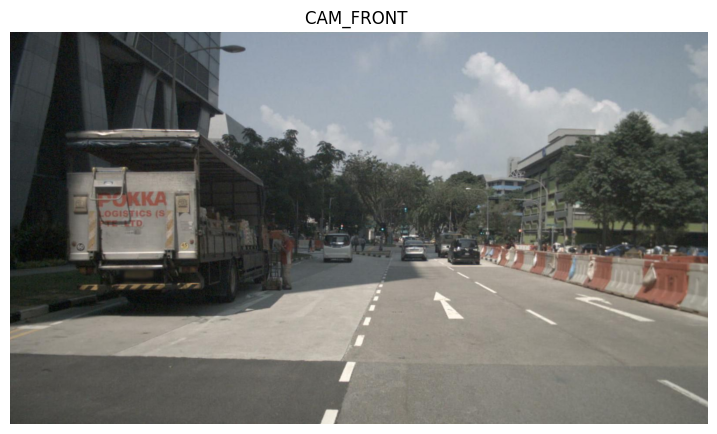

In [16]:
nusc.render_sample_data(cam_front_data['token'], with_anns=False)

In [51]:
cam_front_data['calibrated_sensor_token']

'1d31c729b073425e8e0202c5c6e66ee1'

In [52]:
nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])

{'token': '1d31c729b073425e8e0202c5c6e66ee1',
 'sensor_token': '725903f5b62f56118f4094b46a4470d8',
 'translation': [1.70079118954, 0.0159456324149, 1.51095763913],
 'rotation': [0.4998015430569128,
  -0.5030316162024876,
  0.4997798114386805,
  -0.49737083824542755],
 'camera_intrinsic': [[1266.417203046554, 0.0, 816.2670197447984],
  [0.0, 1266.417203046554, 491.50706579294757],
  [0.0, 0.0, 1.0]]}

In [53]:
nusc.get('ego_pose', cam_front_data['ego_pose_token'])


{'token': 'e3d495d4ac534d54b321f50006683844',
 'timestamp': 1532402927612460,
 'rotation': [0.5720063498929273,
  -0.0021434844534272707,
  0.011564094980151613,
  -0.8201648693182716],
 'translation': [411.4199861830012, 1181.197175631848, 0.0]}